In [1]:
import scvelo as scv
import numpy as np
import pandas as pd
import scipy
import scanpy as sc

In [2]:
adata = scv.datasets.gastrulation_e75()

saving figure to file figure/gastrulation_subset_proportions.png


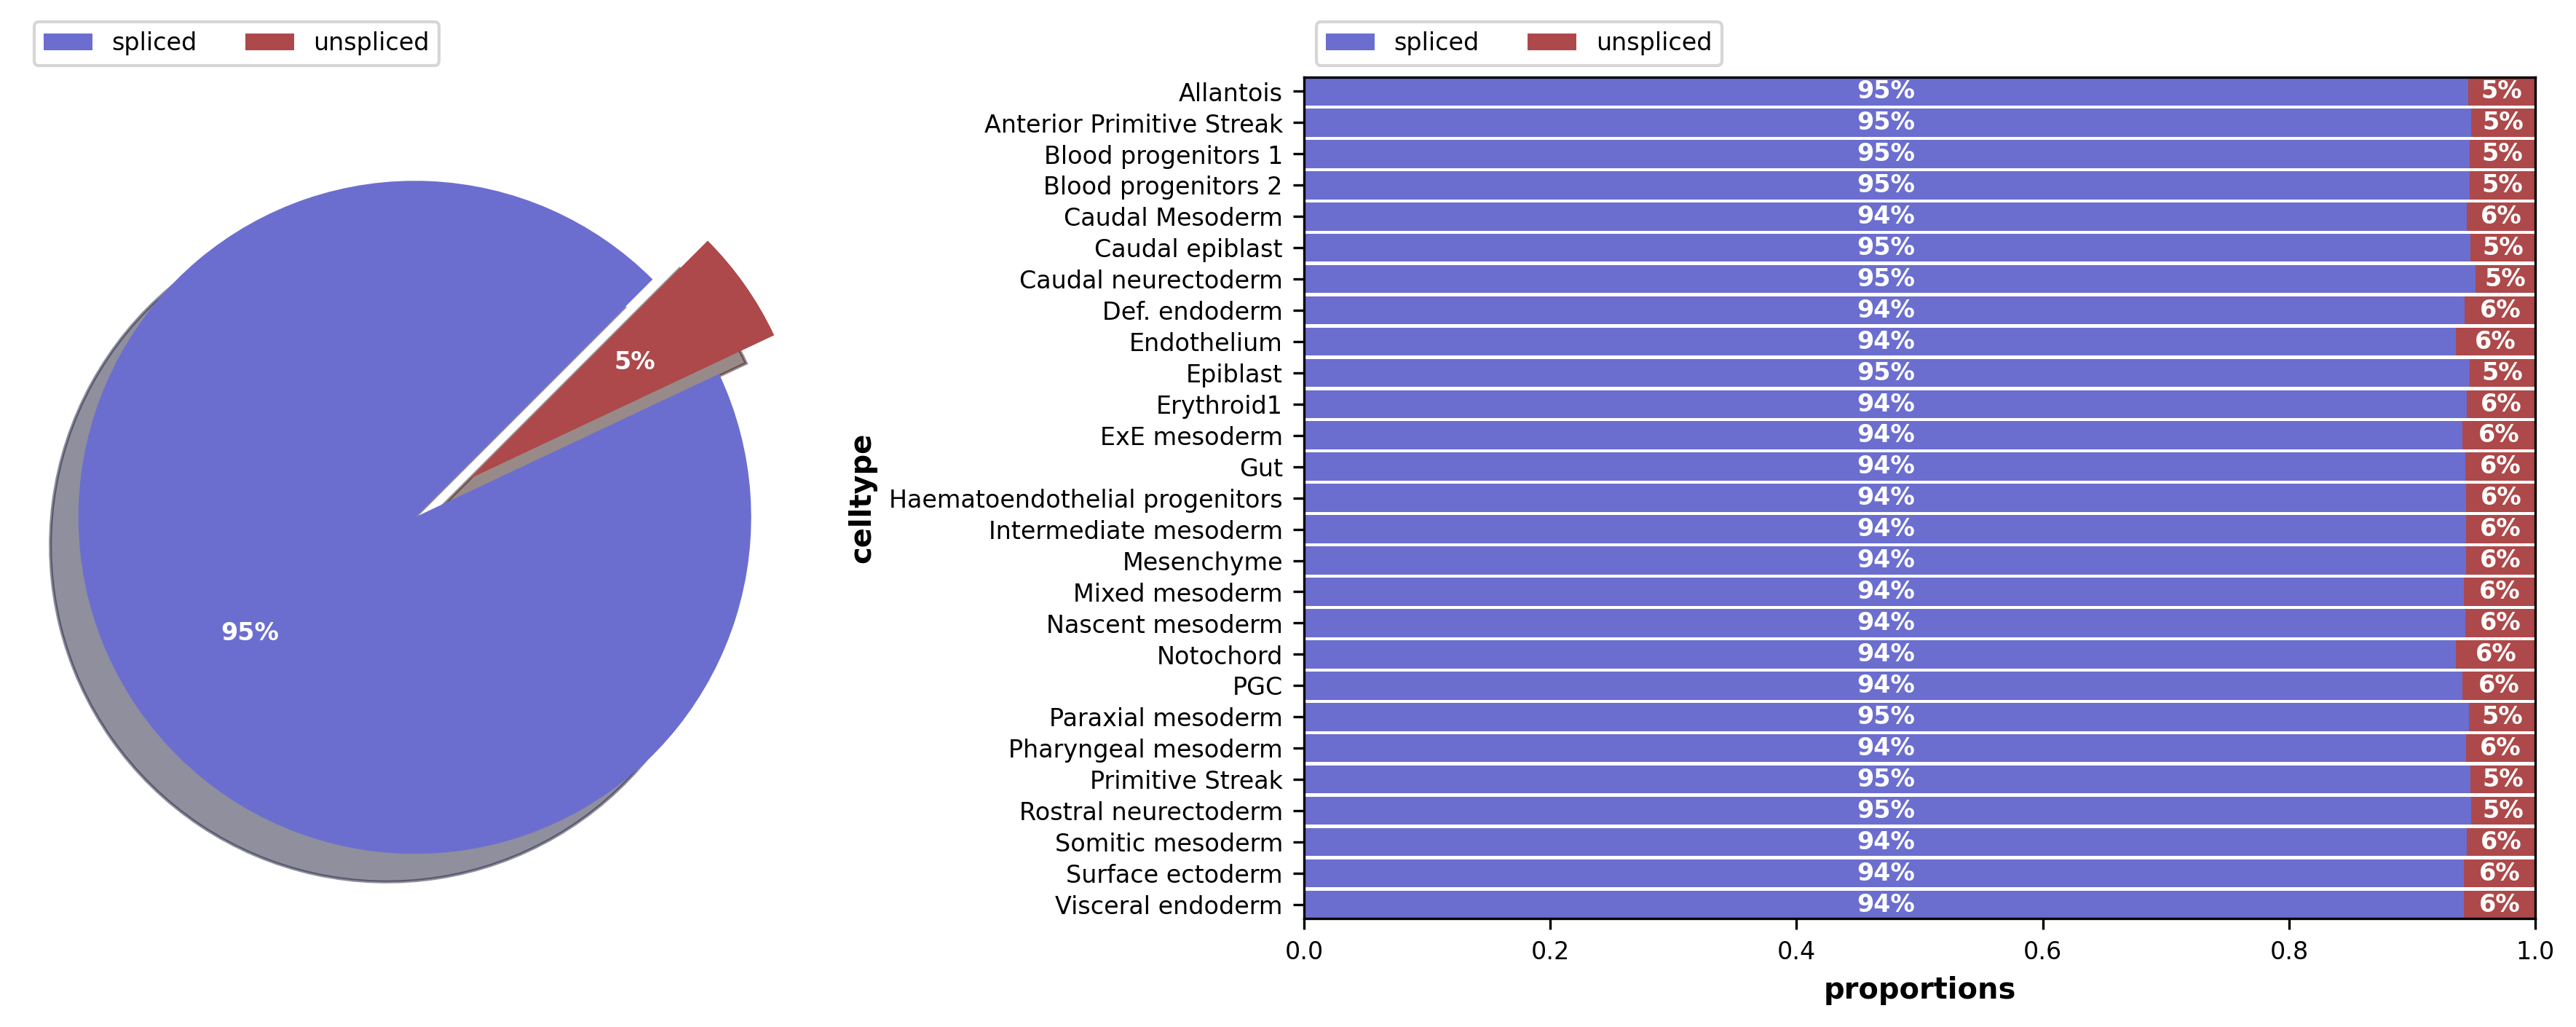

In [3]:
scv.pl.proportions(adata, groupby = "celltype", save = "figure/gastrulation_subset_proportions.png", dpi = 300, figsize = (16, 5), layers = ["spliced", "unspliced"])

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 47032 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.recover_dynamics(adata, n_jobs = 16)

recovering dynamics (using 16/24 cores)


  0%|          | 0/993 [00:00<?, ?gene/s]

    finished (0:00:55) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [6]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/7202 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [8]:
scv.tl.latent_time(adata)

computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


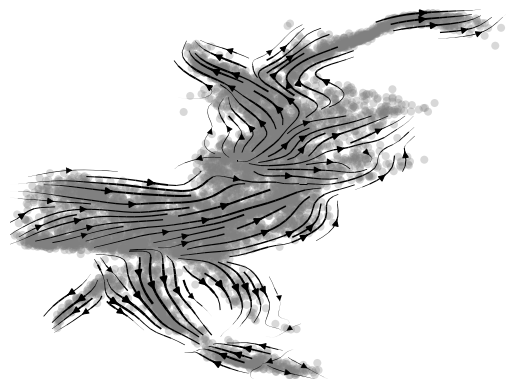

In [9]:
scv.pl.velocity_embedding_stream(adata)

In [10]:
adata.write_h5ad("data/scvelo.h5ad")

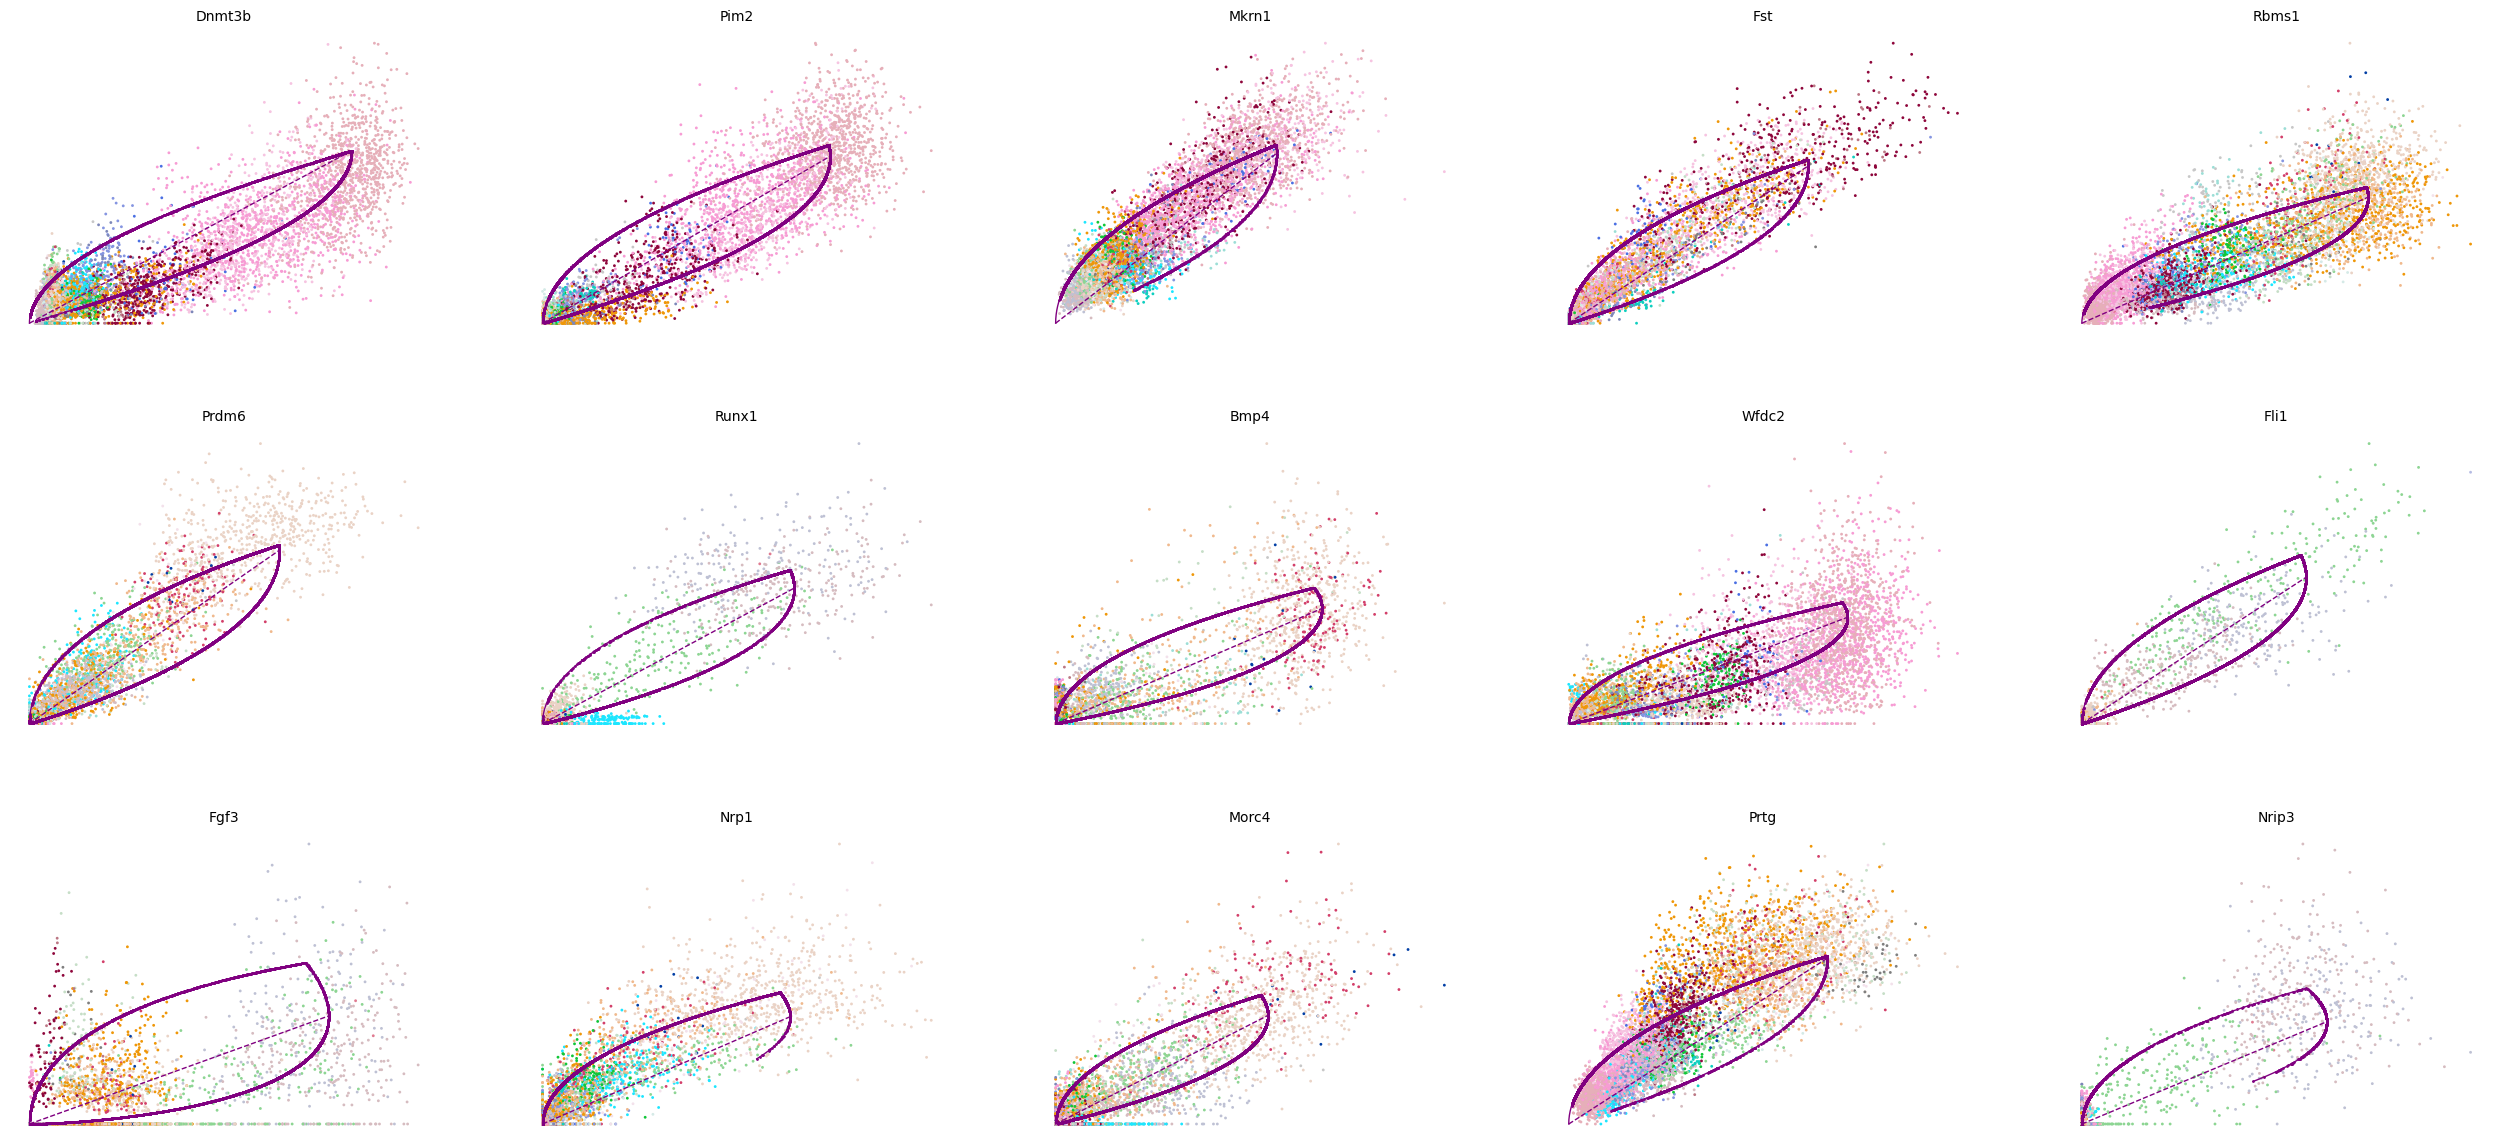

In [12]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False, color = "celltype")

In [18]:
celltype = adata.obs.celltype.cat.categories

In [19]:
color = adata.uns["celltype_colors"]

In [20]:
{k:v for k, v in zip(celltype, color)}

{'Allantois': '#023fa5',
 'Anterior Primitive Streak': '#7d87b9',
 'Blood progenitors 1': '#bec1d4',
 'Blood progenitors 2': '#d6bcc0',
 'Caudal Mesoderm': '#bb7784',
 'Caudal epiblast': '#8e063b',
 'Caudal neurectoderm': '#4a6fe3',
 'Def. endoderm': '#8595e1',
 'Endothelium': '#b5bbe3',
 'Epiblast': '#e6afb9',
 'Erythroid1': '#e07b91',
 'ExE mesoderm': '#d33f6a',
 'Gut': '#11c638',
 'Haematoendothelial progenitors': '#8dd593',
 'Intermediate mesoderm': '#c6dec7',
 'Mesenchyme': '#ead3c6',
 'Mixed mesoderm': '#f0b98d',
 'Nascent mesoderm': '#ef9708',
 'Notochord': '#0fcfc0',
 'PGC': '#9cded6',
 'Paraxial mesoderm': '#d5eae7',
 'Pharyngeal mesoderm': '#f3e1eb',
 'Primitive Streak': '#f6c4e1',
 'Rostral neurectoderm': '#f79cd4',
 'Somitic mesoderm': '#7f7f7f',
 'Surface ectoderm': '#c7c7c7',
 'Visceral endoderm': '#1CE6FF'}